In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1 style="background:orange;">Importing Dataset</h1>

In [44]:
df = pd.read_csv("Placement Data.csv",index_col="sl_no")

<h1 style="background:orange;">Understanding the data</h1>

In [46]:
df["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [47]:
df.shape

(215, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [49]:
df["status"].unique()

array(['Placed', 'Not Placed'], dtype=object)

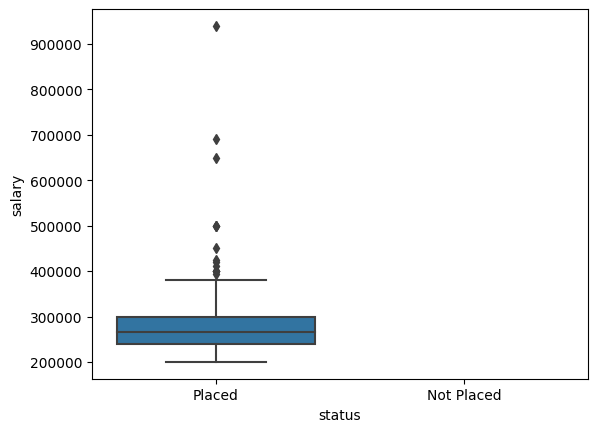

In [50]:
sns.boxplot(x="status",y="salary",data=df)
plt.show()

In [51]:
def auto_fiells(cols):
    salary = cols[0]
    status = cols[1]
    
    if pd.isnull(salary):
        if status=="Not Placed":
            return 0
    else:
        return salary
df["salary"] = df[["salary","status"]].apply(auto_fiells,axis=1)

In [52]:
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Removing Salary column because otherwise created model will be based on cramming

### Storing Data in new variable and drop salary column

In [119]:
data = df.drop("salary",axis=1)
# data = df

In [120]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [121]:
data["gender"].unique()

array(['M', 'F'], dtype=object)

In [122]:
data["ssc_b"].unique()

array(['Others', 'Central'], dtype=object)

In [123]:
data["hsc_b"].unique()

array(['Others', 'Central'], dtype=object)

In [124]:
data["hsc_s"].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [125]:
data["degree_t"].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [126]:
data["workex"].unique()

array(['No', 'Yes'], dtype=object)

In [127]:
data["specialisation"].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [128]:
data["status"].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [129]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


## Splitting the data into four parts

In [130]:
from sklearn.model_selection import train_test_split

x = data.drop("status",axis=1)
y = data["status"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=101)

<h1 style="background:orange;">Label Encoding for target variable</h1>

In [131]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
y_train_new = en.fit_transform(y_train)
y_test_new = en.transform(y_test)

<h1 style="background:orange;">One Hot Encoding because this data is nominal categorical</h1>

In [132]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

tra = ColumnTransformer(
    transformers=[
        ("t1",OneHotEncoder(sparse_output=False,drop="first"),["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation"])
    ],
    remainder="passthrough"
)

In [133]:
x_train_new = tra.fit_transform(x_train)
x_test_new = tra.transform(x_test)

In [134]:
x_train_new.shape

(172, 14)

<h1 style="background:orange;">Training model before feature scaling</h1>

In [135]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_new,y_train_new)

out = model.predict(x_test_new)

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
from sklearn.metrics import accuracy_score

accuracy = round(accuracy_score(out,y_test_new)*100,2)

## Accuracy

In [137]:
accuracy

86.05

<h1 style="background:orange;">Training model after Applying Standardization Scaling</h1>

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_new)
x_train_new = scaler.transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

In [139]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train_new,y_train_new)

out2 = model2.predict(x_test_new)

In [140]:
from sklearn.metrics import accuracy_score

accuracy2 = round(accuracy_score(out2,y_test_new)*100,2)

## accuracy

In [141]:
accuracy

86.05

<p style="background:pink;">It can be seen that before feature scaling a warning is showing which tell us that apply feature scaling.And when we applied feature scaling, then accuracy remains the same.So, in this case feature scaling don't play important role becaues of same accuracy.But, in some cases feature scaling is really helpful and play import rule...</p>

<h1 style="background:orange;">Other algorithms</h1>

# 1. Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()
model3.fit(x_train_new,y_train_new)

out3 = model3.predict(x_test_new)

In [156]:
from sklearn.metrics import accuracy_score

accuracy3 = round(accuracy_score(out3,y_test_new)*100,2)

## Accuracy

In [157]:
accuracy3

88.37

# 2. DecisionTree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier()
model4.fit(x_train_new,y_train_new)

out4 = model4.predict(x_test_new)

In [162]:
from sklearn.metrics import accuracy_score

accuracy4 = round(accuracy_score(out4,y_test_new)*100,2)

## Accuracy

In [163]:
accuracy4

79.07

# 3. Gradient Boosting Classifier

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

model5 = GradientBoostingClassifier()
model5.fit(x_train_new,y_train_new)

out5 = model5.predict(x_test_new)

In [165]:
from sklearn.metrics import accuracy_score

accuracy5 = round(accuracy_score(out5,y_test_new)*100,2)

## Accuracy

In [166]:
accuracy5

83.72

<h1 style="background-color:orange;">Conclusion:</h1>

<p style="background:pink;">Highest accuracy is of Random Forest Classifier which is 88%</p>